In [ ]:
%ls

purchase.csv  sample_data/


In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 8.4 MB/s 


In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from matplotlib.colorbar import constrained_layout
from scipy.integrate import simps
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from calendar import isleap
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.tri as mtri
import numpy as np
import koreanize_matplotlib
import string
import scipy as sp
import scipy.stats
import random
import statsmodels.api as sm
import missingno as msno
import patsy
import warnings
warnings.filterwarnings('ignore')
from patsy import demo_data
from patsy import dmatrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans

In [ ]:
purchase = pd.read_csv('purchase.csv')

In [ ]:
purchase

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
x = purchase[['Age','EstimatedSalary']]
sc_purchase = StandardScaler()
x_sc = sc_purchase.fit_transform(x)

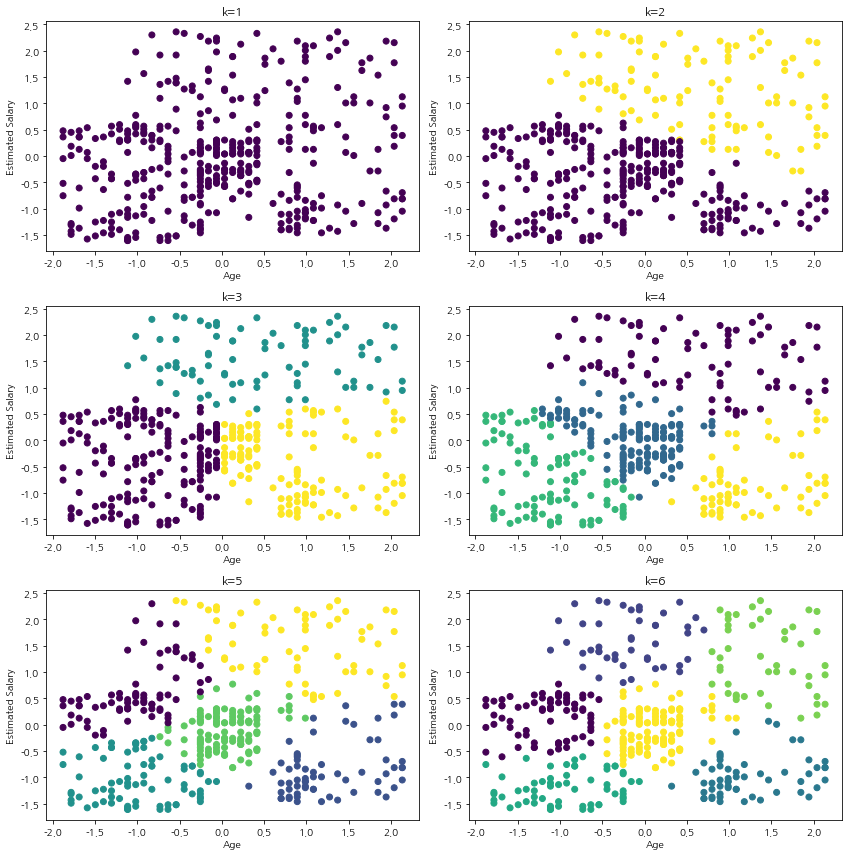

In [ ]:
# k-Means 알고리즘은 클러스터링(분류)에 쓸 수 있음
plt.figure(figsize=(12,12))

for k in range(1,7):
    km = KMeans(n_clusters=k)
    km.fit(x_sc)
    ids = km.predict(x_sc)
    
    plt.subplot(3,2, k)
    plt.tight_layout()

    plt.title(f'k={k}')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')

    plt.scatter(x_sc[:,0], x_sc[:,1], c=ids)
plt.show()

In [ ]:
k = 2
km_2 = KMeans(n_clusters=k)
km_2.fit(x_sc)
km_df_2 = purchase.copy()
ids = km_2.predict(x_sc)

km_df_2['cluster'] = ids
km_df_2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,1
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,1


In [ ]:
km_df_2[km_df_2['Purchased'] == km_df_2['cluster']]

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
16,15733883,Male,47,25000,1,1
17,15617482,Male,45,26000,1,1
18,15704583,Male,46,28000,1,1
19,15621083,Female,48,29000,1,1
20,15649487,Male,45,22000,1,1
...,...,...,...,...,...,...
393,15635893,Male,60,42000,1,1
395,15691863,Female,46,41000,1,1
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,1


In [ ]:
km_df_2[km_df_2['Purchased'] != km_df_2['cluster']]

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,1
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
382,15715622,Female,44,139000,1,0
385,15775335,Male,56,60000,1,0
387,15627220,Male,39,71000,0,1
394,15757632,Female,39,59000,0,1


In [ ]:
print(sum(km_df_2['Purchased'] != km_df_2['cluster'])/len(km_df_2))

0.8225
